In [1]:
# TCC: 
# Code: 
# Author: Anísio Pereira Batista Filho

## Importações

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud

## Abertura de arquivo e criação do dataframe:

In [3]:
df = pd.read_csv('data/corpus_labeled/iguais/bases_tcc/03_geracao_carcteristicas_base.csv', sep=",", low_memory=False)

In [4]:
dfA1 = pd.read_csv("data/corpus_labeled/rotulaçao1[anisiofilho].csv", sep=",", low_memory=True)
dfA1.drop_duplicates(subset='tweet_id', keep='first', inplace=True)

In [5]:
dfB1 = pd.read_csv("data/corpus_labeled/rotulaçao1[debora].csv", sep=",", low_memory=True)
dfB1.drop_duplicates(subset='tweet_id', keep='first', inplace=True)

In [6]:
dfA2 = pd.read_csv("data/corpus_labeled/rotulaçao2[anisiofilho].csv", sep=",", low_memory=True)
dfA2.drop_duplicates(subset='tweet_id', keep='first', inplace=True)

In [7]:
dfB2 = pd.read_csv("data/corpus_labeled/rotulaçao2[andre].csv", sep=",", low_memory=True)
dfB2.drop_duplicates(subset='tweet_id', keep='first', inplace=True)

## Funções

### Inicializações

In [8]:
tqdm.pandas()

### Módulos

#### Ajustador de turnos

In [9]:
def ajusta_turno(linha):
    return linha.capitalize()

##### Ajustador de usuários

In [10]:
def ajusta_usuarios(linha):
    if linha == 'invalid_user':
        return 'Usuário Inválido'
    else:
        return linha

#### Ajustador de estados

In [11]:
def ajusta_estados(linha):
    if linha == 'invalidstate':
        return 'Inválido (Usuário não informou sua localização)'
    elif linha == 'notbrazilstate':
        return 'Exterior (Fora do Brasil)'
    elif linha == 'statenotdefined':
        return 'Brasil (Localização definida apenas como Brasil)'
    else:
        return linha

#### Ajustador de regiões

In [12]:
def ajusta_regioes(linha):
    if linha == 'invalidregion':
        return 'Inválido<br>(Usuário não informou sua localização)'
    elif linha == 'notbrazilregion':
        return 'Exterior<br>(Fora do Brasil)'
    elif linha == 'regionnotdefined':
        return 'Brasil<br>(Localização definida apenas como Brasil)'
    else:
        return linha

#### Ajustador de rótulos

In [13]:
def ajusta_rotulo(linha):
    if linha == -1:
        return 'Notícia Verdadeira'
    elif linha == 0:
        return 'Opinião'
    elif linha == 1:
        return 'Notícia Falsa'

### Contador de frequência de palavras:

In [14]:
def gera_frequencia_palavras(dicionario_frequencia, dataframe, coluna, rotulo):
    for index, row in tqdm(dataframe.iterrows()):
        if row.label_A == rotulo:
            row[coluna] = eval(row[coluna])
            for palavra in row[coluna]:
                
                if palavra not in dicionario_frequencia.keys():
                    dicionario_frequencia[palavra] = 1
                else:
                    dicionario_frequencia[palavra] += 1
    
    dicionario_frequencia = dict(sorted(dicionario_frequencia.items(), key=lambda item: item[1]))
    
    return dicionario_frequencia

### Gerador de nuvem de palavras

In [15]:
def gera_nuvem_palavras(dicionario_frequencia):
    wordcloud = WordCloud(#font_path=None, 
                        width=800, 
                        height=400, 
                        margin=2, 
                        ranks_only=None, 
                        prefer_horizontal=0.9, 
                        mask=None, 
                        scale=1, 
                        color_func=None, 
                        max_words=500, 
                        min_font_size=4, 
                        stopwords=None, 
                        random_state=None, 
                        background_color='white', 
                        max_font_size=None, 
                        font_step=1, 
                        mode='RGB', 
                        relative_scaling='auto', 
                        regexp=None, 
                        collocations=True, 
                        colormap='hsv', 
                        normalize_plurals=True, 
                        contour_width=0, 
                        contour_color='black', 
                        repeat=False, 
                        include_numbers=False, 
                        min_word_length=0, 
                        collocation_threshold=30).generate_from_frequencies(dicionario_frequencia)
    
    fig, ax = plt.subplots(figsize=(16,8))
    ax.imshow(wordcloud, interpolation='bilinear')       
    ax.set_axis_off()
    
    return fig, wordcloud

## Main

### Análise exploratória da base de dados

#### Gráfico de turnos

In [16]:
df_turnos_grafico = df.time_shift.value_counts().reset_index()
df_turnos_grafico.rename(columns={'index':'Turno','time_shift':'Quantidade'}, inplace=True)
df_turnos_grafico['Turno'] = df_turnos_grafico['Turno'].progress_map(ajusta_turno)


  0%|          | 0/3 [00:00<?, ?it/s]

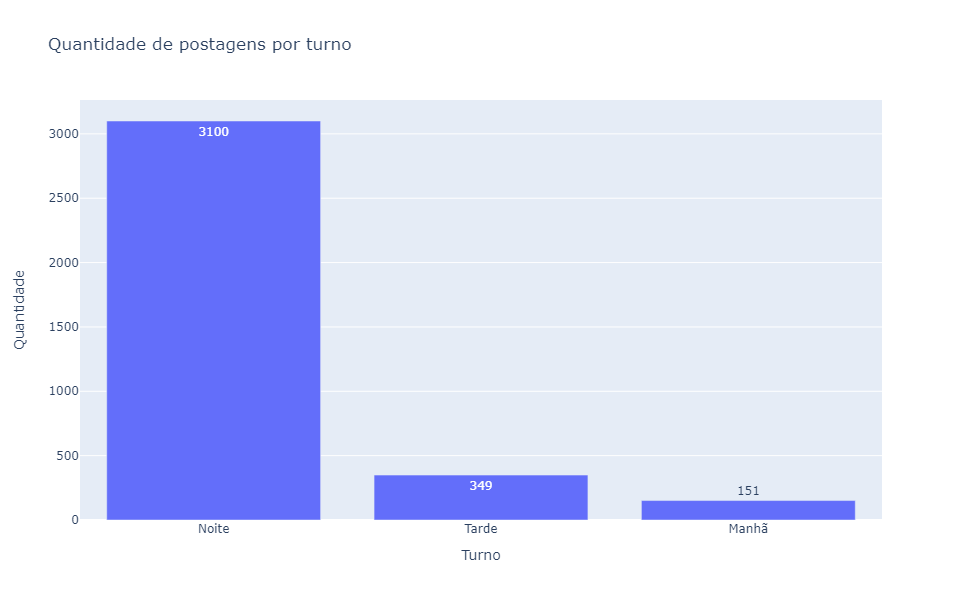

In [17]:
fig = px.bar(df_turnos_grafico, 
             x='Turno', 
             y='Quantidade', 
             title='Quantidade de postagens por turno', 
             text_auto=True,
             width=1000,
             height=600,
            )
fig.show()

#### Gráfico de nomes de usuários

In [18]:
df_usuarios_grafico = df.user_screen_name.value_counts().reset_index()[0:10]
df_usuarios_grafico.rename(columns={'index':'Nome de usuário','user_screen_name':'Quantidade'}, inplace=True)
df_usuarios_grafico.sort_values(by='Quantidade', ascending=True, inplace=True)
df_usuarios_grafico['Nome de usuário'] = df_usuarios_grafico['Nome de usuário'].progress_map(ajusta_usuarios)

  0%|          | 0/10 [00:00<?, ?it/s]

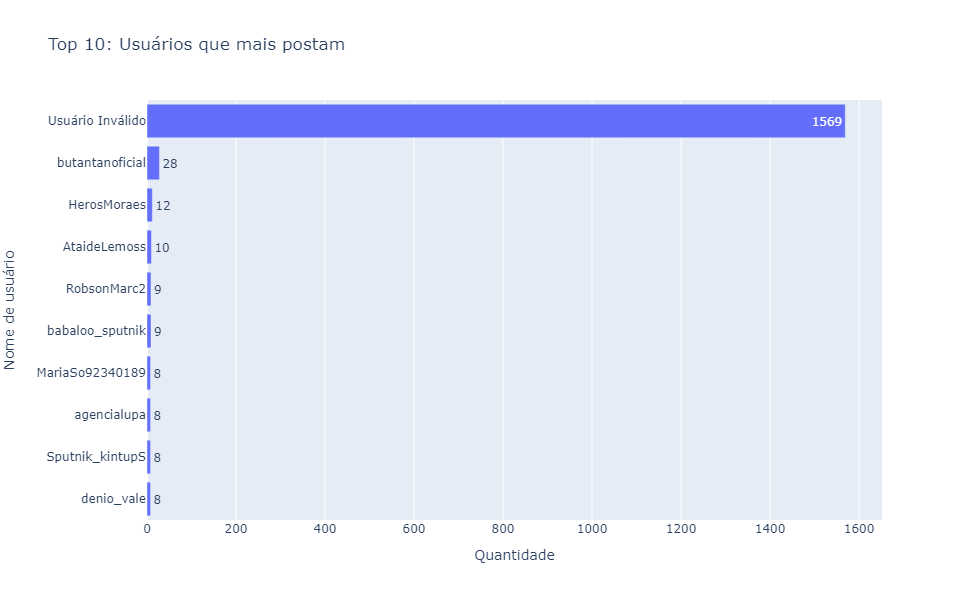

In [19]:
fig = px.bar(df_usuarios_grafico, 
             y='Nome de usuário', 
             x='Quantidade', 
             title='Top 10: Usuários que mais postam', 
             text_auto=True,
             orientation='h',
             width=1000,
             height=600,
            )
fig.show()

#### Gráfico de Estados

In [20]:
df_estados_grafico = df.state_location.value_counts().reset_index()
df_estados_grafico.rename(columns={'index':'Estado','state_location':'Quantidade'}, inplace=True)
df_estados_grafico.sort_values(by='Quantidade', ascending=True, inplace=True)
df_estados_grafico['Estado'] = df_estados_grafico['Estado'].progress_map(ajusta_estados)

  0%|          | 0/29 [00:00<?, ?it/s]

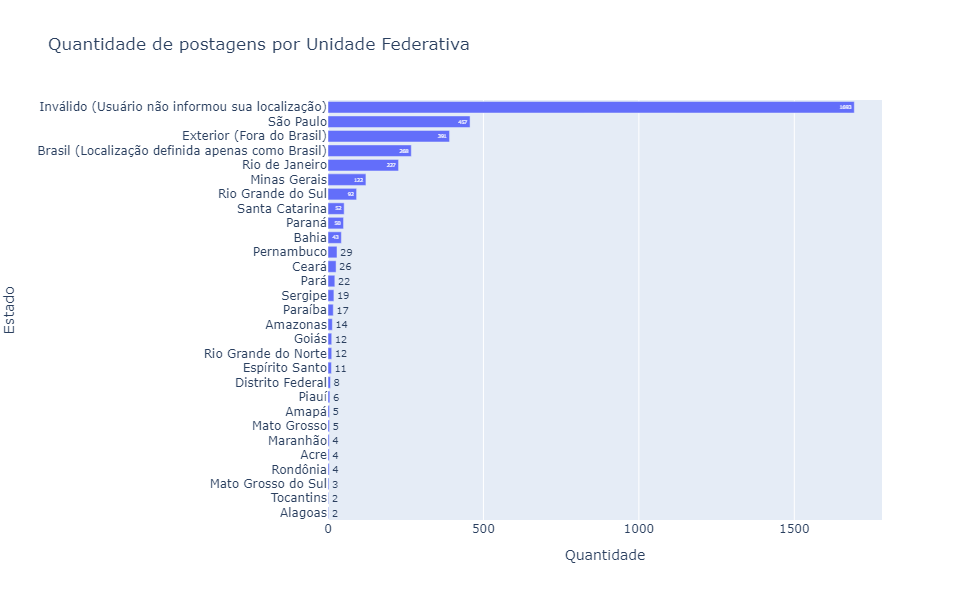

In [21]:
fig = px.bar(df_estados_grafico, 
             y='Estado', 
             x='Quantidade', 
             title='Quantidade de postagens por Unidade Federativa', 
             text_auto=True, 
             orientation='h',
             width=1000,
             height=600,
            )
fig.show()

#### Gráfico de Regiões

In [22]:
df_regioes_grafico = df.region_location.value_counts().reset_index()
df_regioes_grafico.rename(columns={'index':'Região','region_location':'Quantidade'}, inplace=True)
df_regioes_grafico.sort_values(by='Quantidade', ascending=True, inplace=True)
df_regioes_grafico['Região'] = df_regioes_grafico['Região'].progress_map(ajusta_regioes)

  0%|          | 0/8 [00:00<?, ?it/s]

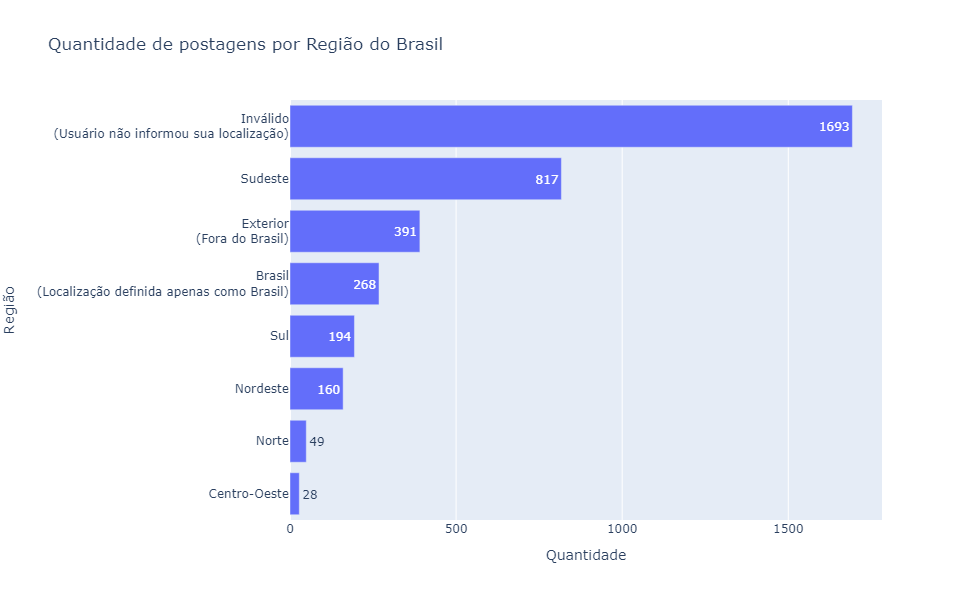

In [23]:
fig = px.bar(df_regioes_grafico, 
             y='Região', 
             x='Quantidade', 
             title='Quantidade de postagens por Região do Brasil', 
             text_auto=True, 
             orientation='h',
             width=1000,
             height=600,
            )
fig.show()

#### Gráfico de rótulo por turno

In [24]:
df_turnos_rotulos = df[['time_shift', 'label_A']].value_counts().reset_index()
df_turnos_rotulos.rename(columns={'time_shift':'Turno','label_A':'Rótulo', 0:'Quantidade'}, inplace=True)
df_turnos_rotulos.sort_values(by='Quantidade', ascending=True, inplace=True)
df_turnos_rotulos['Turno'] = df_turnos_rotulos['Turno'].progress_map(ajusta_turno) 
df_turnos_rotulos['Rótulo'] = df_turnos_rotulos['Rótulo'].progress_map(ajusta_rotulo)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

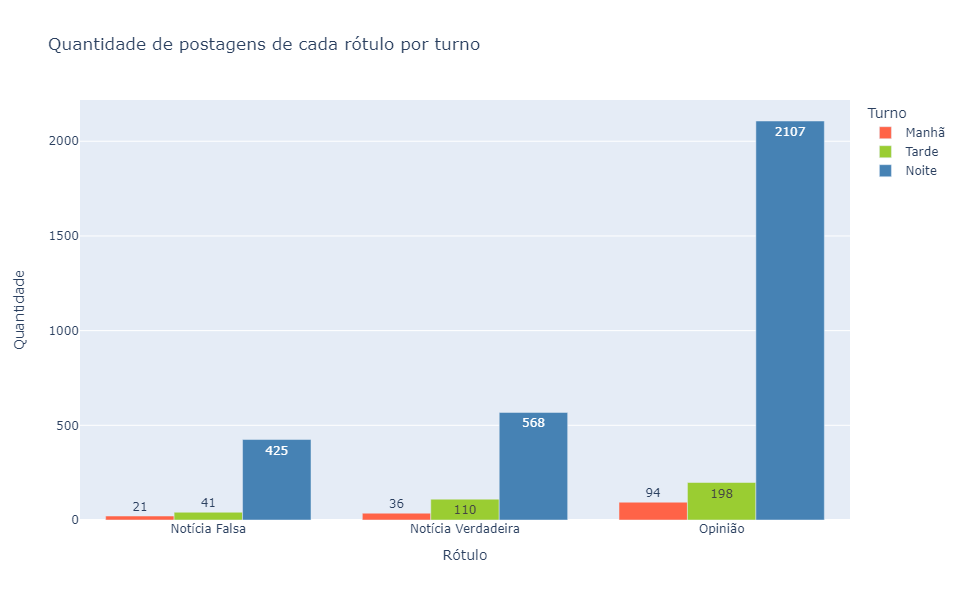

In [25]:
fig = px.bar(df_turnos_rotulos, 
             x='Rótulo', 
             y='Quantidade', 
             color='Turno',
             color_discrete_map={
                                    'Manhã':'tomato',
                                    'Tarde':'yellowgreen',
                                    'Noite':'steelblue',
                                },
             barmode='group',
             title='Quantidade de postagens de cada rótulo por turno',
             text_auto=True,
             width=1000,
             height=600,
            )
fig.show()

#### Gráfico de rótulo por região

In [26]:
df_regioes_rotulos = df[['region_location', 'label_A']].value_counts().reset_index()
df_regioes_rotulos.rename(columns={'region_location':'Região','label_A':'Rótulo', 0:'Quantidade'}, inplace=True)
df_regioes_rotulos.sort_values(by='Quantidade', ascending=True, inplace=True)
df_regioes_rotulos['Rótulo'] = df_regioes_rotulos['Rótulo'].progress_map(ajusta_rotulo) 
df_regioes_rotulos['Região'] = df_regioes_rotulos['Região'].progress_map(ajusta_regioes)

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

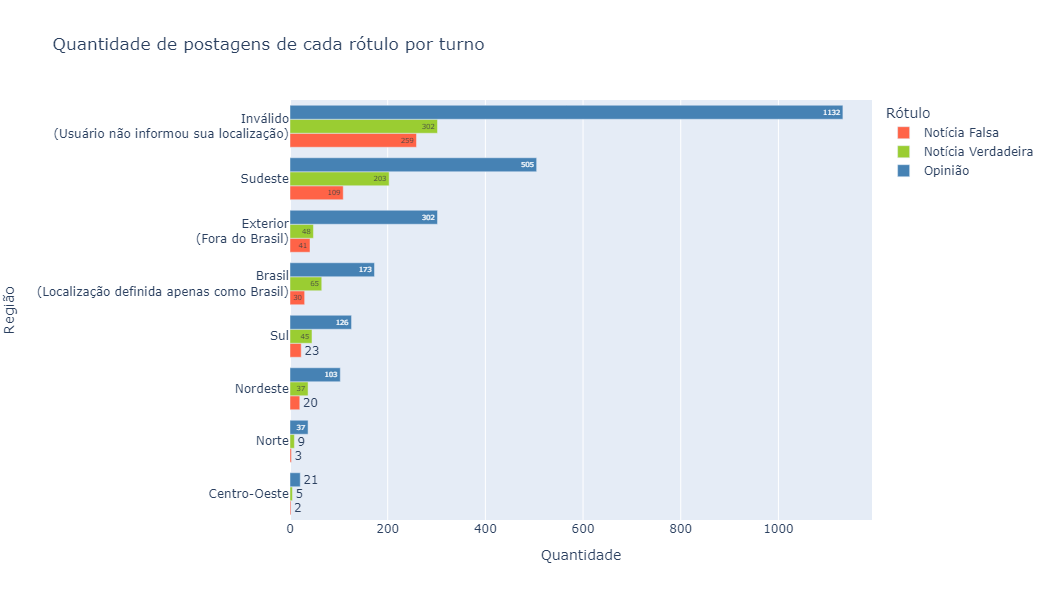

In [27]:
fig = px.bar(df_regioes_rotulos, 
             y='Região', 
             x='Quantidade', 
             color='Rótulo',
             color_discrete_map={
                                    'Notícia Falsa':'tomato',
                                    'Notícia Verdadeira':'yellowgreen',
                                    'Opinião':'steelblue',
                                },
             barmode='group',
             title='Quantidade de postagens de cada rótulo por turno', 
             text_auto=True,
             orientation='h',
             width=1000,
             height=600,
            )
fig.show()

#### Gráfico de rótulo por nome de usuário

In [28]:
lista_usuarios_top = df_usuarios_grafico['Nome de usuário'].to_list()
lista_usuarios_top.append('invalid_user')

In [29]:
df_usuario_rotulos = df[['user_screen_name', 'label_A']].value_counts().reset_index()
df_usuario_rotulos = df_usuario_rotulos[df_usuario_rotulos['user_screen_name'].isin(lista_usuarios_top)]
df_usuario_rotulos.rename(columns={'user_screen_name':'Nome de usuário','label_A':'Rótulo', 0:'Quantidade'}, inplace=True)
df_usuario_rotulos.sort_values(by=['Quantidade'], ascending=True, inplace=True)
df_usuario_rotulos['Rótulo'] = df_usuario_rotulos['Rótulo'].progress_map(ajusta_rotulo)
df_usuario_rotulos['Nome de usuário'] = df_usuario_rotulos['Nome de usuário'].progress_map(ajusta_usuarios)

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

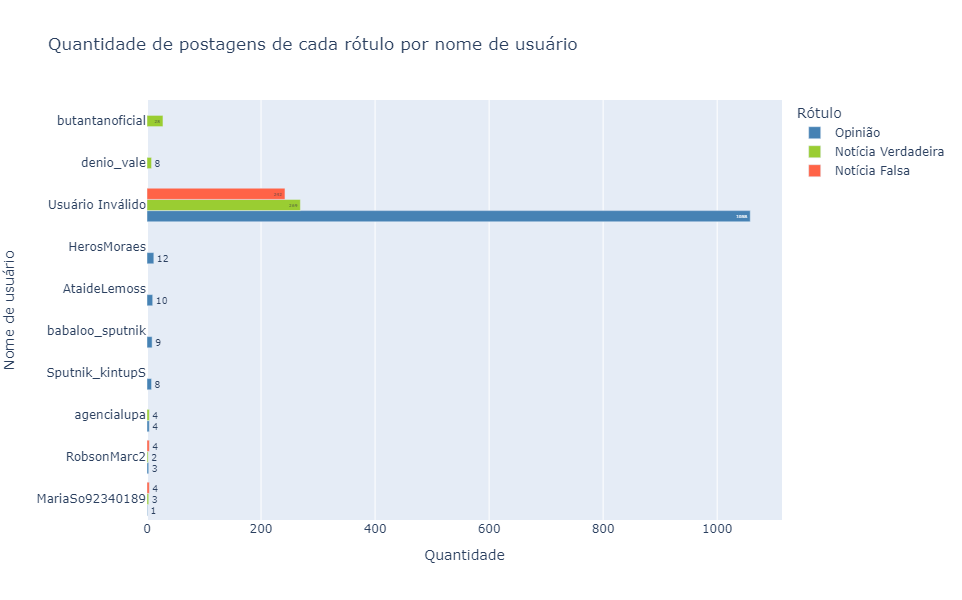

In [30]:
fig = px.bar(df_usuario_rotulos, 
             y='Nome de usuário', 
             x='Quantidade', 
             color='Rótulo',
             color_discrete_map={
                                    'Notícia Falsa':'tomato',
                                    'Notícia Verdadeira':'yellowgreen',
                                    'Opinião':'steelblue',
                                },
             barmode='group',
             title='Quantidade de postagens de cada rótulo por nome de usuário', 
             text_auto=True,
             orientation='h',
             width=1000,
             height=600,
            )
fig.show()

### Análises por classe entre os rotuladores

#### Gráfico de distribuição de classes entre os rotuladores A1 e B1

In [31]:
df_dist_rotuloA1 = dfA1['label'].value_counts().reset_index()
df_dist_rotuloA1['Rotulador'] = 'A1'
df_dist_rotuloA1.rename(columns={'index':'Rótulo', 'label':'Quantidade'}, inplace=True)
df_dist_rotuloA1['Rótulo'] = df_dist_rotuloA1['Rótulo'].progress_map(ajusta_rotulo)

  0%|          | 0/3 [00:00<?, ?it/s]

In [32]:
df_dist_rotuloB1 = dfB1['label'].value_counts().reset_index()
df_dist_rotuloB1['Rotulador'] = 'B1'
df_dist_rotuloB1.rename(columns={'index':'Rótulo', 'label':'Quantidade'}, inplace=True)
df_dist_rotuloB1['Rótulo'] = df_dist_rotuloB1['Rótulo'].progress_map(ajusta_rotulo)

  0%|          | 0/3 [00:00<?, ?it/s]

In [33]:
df_dist_rotuloA1B1 = pd.concat([df_dist_rotuloA1, df_dist_rotuloB1])

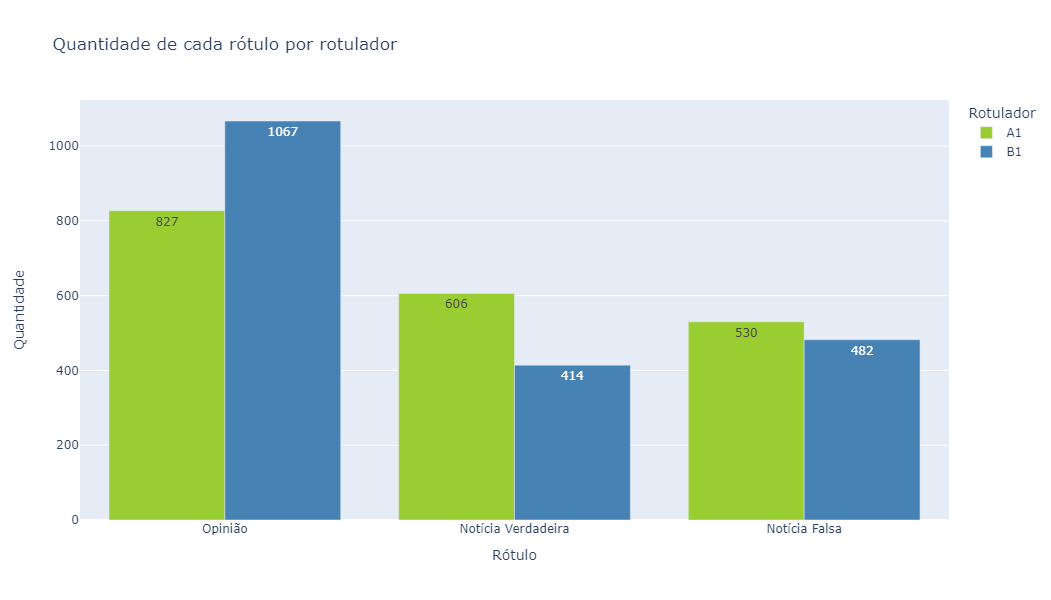

In [34]:
fig = px.bar(df_dist_rotuloA1B1, 
             x='Rótulo', 
             y='Quantidade', 
             color='Rotulador',
             color_discrete_map={
                                    #'A1':'tomato',
                                    'A1':'yellowgreen',
                                    'B1':'steelblue',
                                },
             barmode='group',
             title='Quantidade de cada rótulo por rotulador', 
             text_auto=True,
             width=1000,
             height=600,
            )
fig.show()

#### Gráfico de distribuição de classes entre os rotuladores A2 e B2

In [35]:
df_dist_rotuloA2 = dfA2['label'].value_counts().reset_index()
df_dist_rotuloA2['Rotulador'] = 'A2'
df_dist_rotuloA2.rename(columns={'index':'Rótulo', 'label':'Quantidade'}, inplace=True)
df_dist_rotuloA2['Rótulo'] = df_dist_rotuloA2['Rótulo'].progress_map(ajusta_rotulo)

  0%|          | 0/3 [00:00<?, ?it/s]

In [36]:
df_dist_rotuloB2 = dfB2['label'].value_counts().reset_index()
df_dist_rotuloB2['Rotulador'] = 'B2'
df_dist_rotuloB2.rename(columns={'index':'Rótulo', 'label':'Quantidade'}, inplace=True)
df_dist_rotuloB2['Rótulo'] = df_dist_rotuloB2['Rótulo'].progress_map(ajusta_rotulo)

  0%|          | 0/3 [00:00<?, ?it/s]

In [37]:
df_dist_rotuloA2B2 = pd.concat([df_dist_rotuloA2, df_dist_rotuloB2])

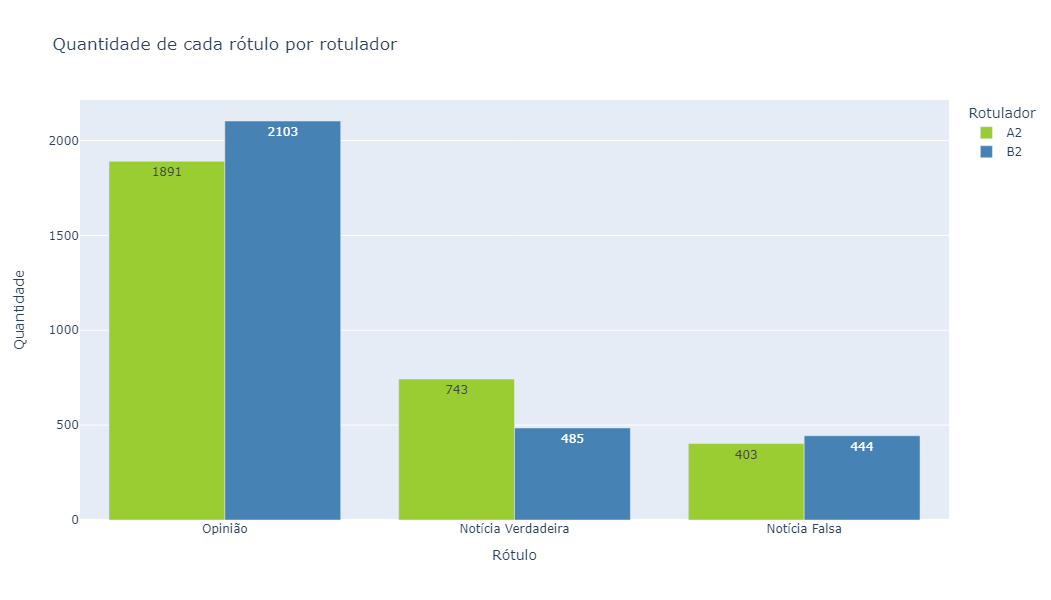

In [38]:
fig = px.bar(df_dist_rotuloA2B2, 
             x='Rótulo', 
             y='Quantidade', 
             color='Rotulador',
             color_discrete_map={
                                    #'A1':'tomato',
                                    'A2':'yellowgreen',
                                    'B2':'steelblue',
                                },
             barmode='group',
             title='Quantidade de cada rótulo por rotulador', 
             text_auto=True,
             width=1000,
             height=600,
            )
fig.show()

### Criação de wordclouds por rótulo

#### Tweet_text_stemming

##### Fake News

In [39]:
stemming_fake_dict = dict()
stemming_fake_dict = gera_frequencia_palavras(stemming_fake_dict, df, 'tweet_text_stemming', 1)

0it [00:00, ?it/s]

C:\Users\anisi\AppData\Local\Temp\ipykernel_9208\571677046.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



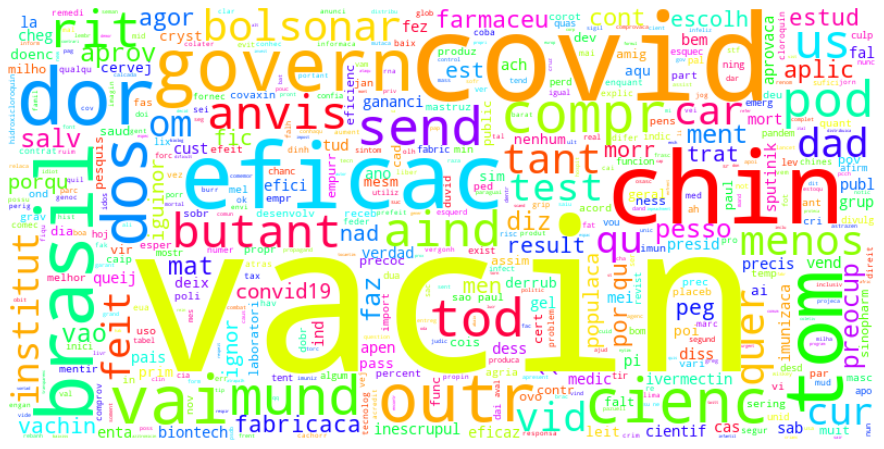

In [40]:
stemming_fake_fig, stemming_fake_wordcloud = gera_nuvem_palavras(stemming_fake_dict)
#stemming_fake_wordcloud.to_file('wordcloud/corpus_labeled/iguais/wordcloud_tcc/03_exploratory_analysis_-_tweet_text_stemming_-_fake.png')
stemming_fake_fig.show()

##### News

In [41]:
stemming_news_dict = dict()
stemming_news_dict = gera_frequencia_palavras(stemming_news_dict, df, 'tweet_text_stemming', -1)

0it [00:00, ?it/s]

C:\Users\anisi\AppData\Local\Temp\ipykernel_9208\3821433536.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



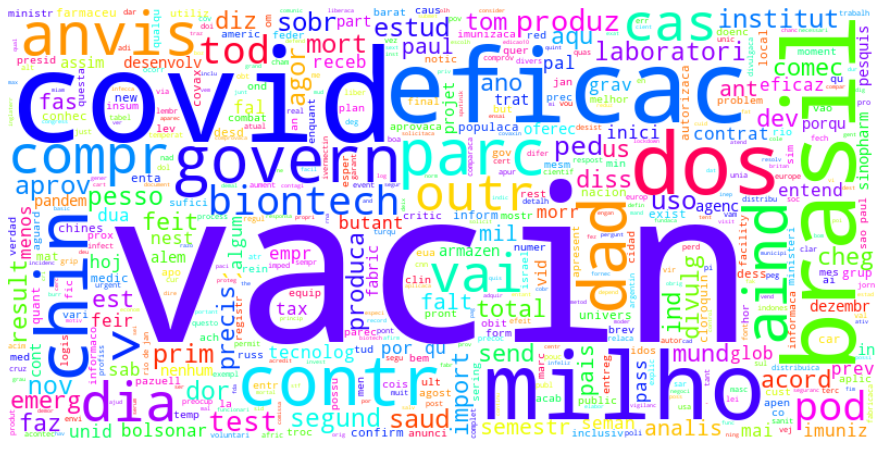

In [42]:
stemming_news_fig, stemming_news_wordcloud = gera_nuvem_palavras(stemming_news_dict)
#stemming_news_wordcloud.to_file('wordcloud/corpus_labeled/iguais/wordcloud_tcc/03_exploratory_analysis_-_tweet_text_stemming_-_news.png')
stemming_news_fig.show()

##### Opinion

In [43]:
stemming_opinion_dict = dict()
stemming_opinion_dict = gera_frequencia_palavras(stemming_opinion_dict, df, 'tweet_text_stemming', -1)

0it [00:00, ?it/s]

C:\Users\anisi\AppData\Local\Temp\ipykernel_9208\3276164087.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



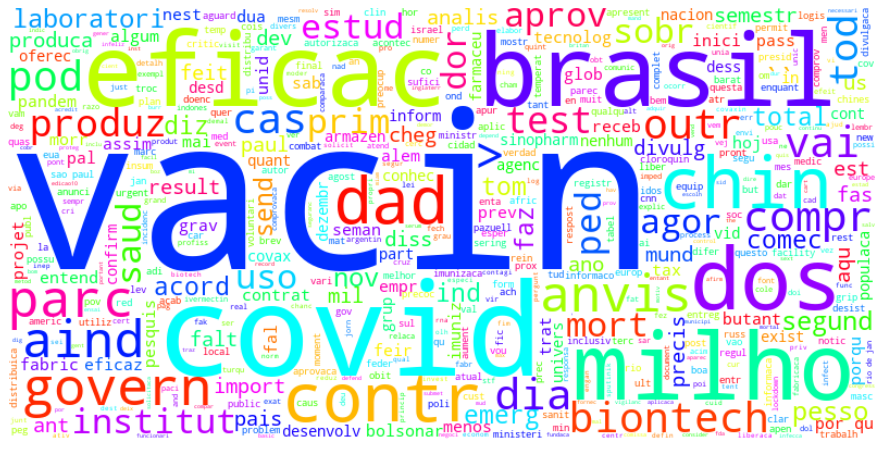

In [44]:
stemming_opinion_fig, stemming_opinion_wordcloud = gera_nuvem_palavras(stemming_opinion_dict)
#stemming_opinion_wordcloud.to_file('wordcloud/corpus_labeled/iguais/wordcloud_tcc/03_exploratory_analysis_-_tweet_text_stemming_-_opinion.png')
stemming_opinion_fig.show()

#### Tweet_text_lemmatization

##### Fake News

In [45]:
lemmatization_fake_dict = dict()
lemmatization_fake_dict = gera_frequencia_palavras(lemmatization_fake_dict, df, 'tweet_text_lemmatization', 1)

0it [00:00, ?it/s]

C:\Users\anisi\AppData\Local\Temp\ipykernel_9208\799859781.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



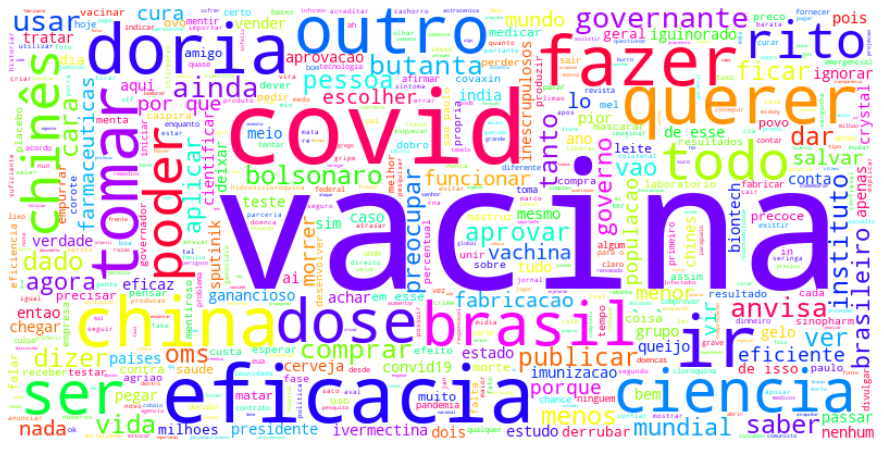

In [46]:
lemmatization_fake_fig, lemmatization_fake_wordcloud = gera_nuvem_palavras(lemmatization_fake_dict)
#lemmatization_fake_wordcloud.to_file('wordcloud/corpus_labeled/iguais/wordcloud_tcc/03_exploratory_analysis_-_tweet_text_lemmatization_-_fake.png')
lemmatization_fake_fig.show()

##### News

In [47]:
lemmatization_news_dict = dict()
lemmatization_news_dict = gera_frequencia_palavras(lemmatization_news_dict, df, 'tweet_text_lemmatization', -1)

0it [00:00, ?it/s]

C:\Users\anisi\AppData\Local\Temp\ipykernel_9208\3336005227.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



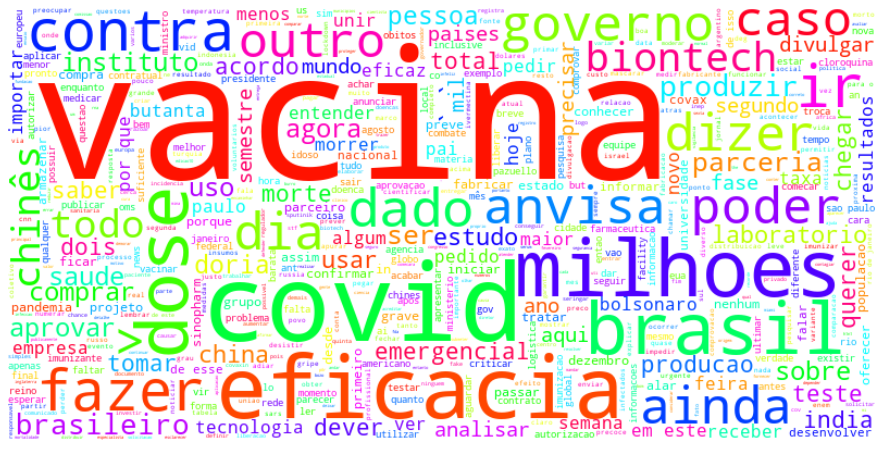

In [48]:
lemmatization_news_fig, lemmatization_news_wordcloud = gera_nuvem_palavras(lemmatization_news_dict)
#lemmatization_news_wordcloud.to_file('wordcloud/corpus_labeled/iguais/wordcloud_tcc/03_exploratory_analysis_-_tweet_text_lemmatization_-_news.png')
lemmatization_news_fig.show()

##### Opinion

In [49]:
lemmatization_opinion_dict = dict()
lemmatization_opinion_dict = gera_frequencia_palavras(lemmatization_opinion_dict, df, 'tweet_text_lemmatization', -1)

0it [00:00, ?it/s]

C:\Users\anisi\AppData\Local\Temp\ipykernel_9208\1487250895.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



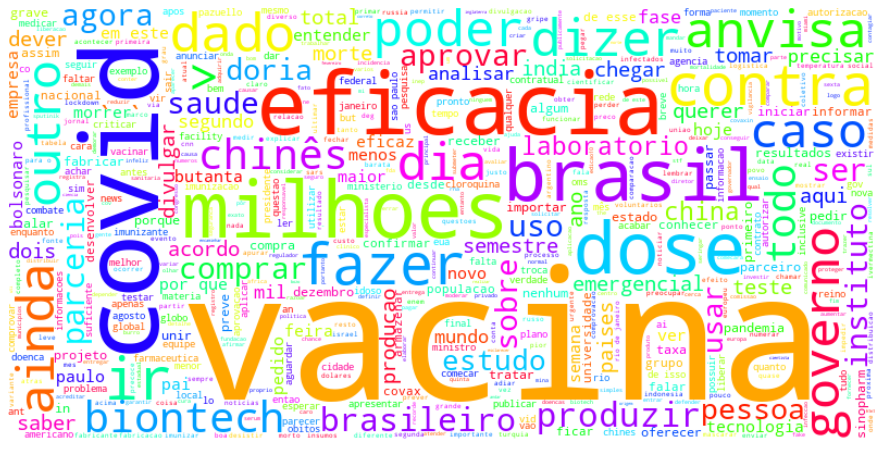

In [50]:
lemmatization_opinion_fig, lemmatization_opinion_wordcloud = gera_nuvem_palavras(lemmatization_opinion_dict)
#lemmatization_opinion_wordcloud.to_file('wordcloud/corpus_labeled/iguais/wordcloud_tcc/03_exploratory_analysis_-_tweet_text_lemmatization_-_opinion.png')
lemmatization_opinion_fig.show()